# DS-211 : Aug-2021 : PS-1

## **Question : 1** 

<font color="blue">
Least Squares Approximated Gaussian Distribution:</font> The task is to analyze the marksscored (out of 100) by 1000 students in a competitive exam using least squares approximated Gaussian distribution.


1. Download the data (marks obtained by 1000 students) given [here](https://drive.google.com/file/d/1dR8eKQcoGIfMocIU18B3rPO58Os2rXFO/view?usp=sharing), and model the data distribution as shown below. Plot the histogram of the data and the Gaussian Fit.  **[0.5 Point]**




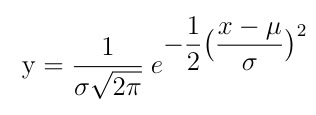

In [49]:
import numpy as np
import os
import matplotlib.pyplot as plt


In [50]:
data = np.load('data_x.npy')
print("Number of data points =",data.shape[0])
mean = data.sum()/data.shape[0]
print("mean =",mean)

Number of data points = 1000
mean = 59.54743292509804


#Calculating Mean and Variance by using result of Maximum lieklihood analysis

In [51]:
mean = data.sum()/data.shape[0]
variance = 0
for i in range(data.shape[0]):
  variance += (data[i] - mean) * (data[i] - mean)
variance = variance/data.shape[0]
print("mean =",mean)
print("Variance =",variance)

mean = 59.54743292509804
Variance = 97.42344563121536


#Plotting of Guassian distribution

In [52]:
import math
#p = math.pi
data_ = sorted(data)
y = []
t = []
for i in data_:
  Y = (math.exp(-(i - mean)**2/(2*variance)))/(math.sqrt(variance * 2 * 3.142))
  y.append(Y)
for i in data[751:]:
  T = (math.exp(-(i - mean)**2/(2*variance)))/(math.sqrt(variance * 2 * 3.142))
  t.append(T)
t = np.array(t)
t = np.reshape(t,(-1,1))

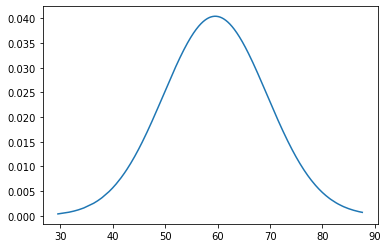

In [53]:
plt.plot(data_,y)
plt.show()

#Plotting of Histogram and Gaussian distribution

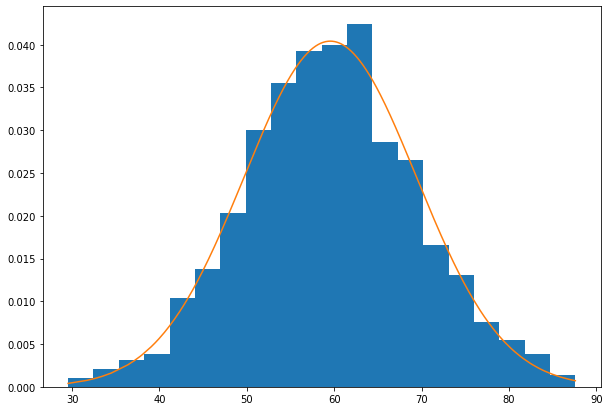

In [54]:
# Creating histogram
n_bins = 20
fig, ax = plt.subplots(figsize =(10, 7))
histo = np.histogram(data,bins = n_bins, density = True)
ax.hist(data, bins = n_bins, density = True)
plt.plot(data_,y) 
# Show plot
plt.show()


2. Polynomial curve fitting using least squares for the data points (x, y). Note that we have modelled 'y' in part 1 of the question. Use the first 750 data points to regress the coefficient vector [β0 β1 β2 ... βn] and validate your obtained fit on the remaining held out 250 data points. The polynomial fit can be modelled as :

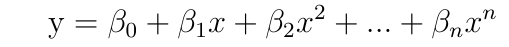



*  Formulate the above shown polynomial fit as a least squares problem and solve it using the pseudoinverse.  Experiment with different values of ‘n’ and report the optimal order of the polynomial for the problem at hand.  Also, report the plot "Mean square Error (MSE) vs n". Compute the MSE from held out 250 data points. **[1 Point]**
 












*   For  the  optimal  ‘n’  found  above,  can  we  solve  the  least  squares  problem  using the Cholesky Decomposition ? If yes, solve it and compare the polynomial fits obtained using pseudoinverse and Cholesky.  If not, then justify your answer. If required you are free to use the in built functions for computing cholesky decomposition. **[1 Point]**






#Least Square Approximation of Normal distribution

In [55]:
#Order of polynomial
test_error = []                   #list to store testing error
train_error = []                  #list to store training error
def solution(n):
  k = n                             
  l = 750
  X = np.zeros((l,k+1))
  for i in range(l):
    X[i,0] = 1
    m = 1
    for j in range(1,k+1):
      X[i,j] = data[i]**m
      m = m + 1
  #Forming right hand side of equation
  y = []
  for i in data[0:750]:
    Y = (math.exp(-(i - mean)**2/(2*variance)))/(math.sqrt(variance * 2 * 3.142))
    y.append(Y)
 
  b = np.array(y)
  b = np.reshape(b,(-1,1))
  
  x = np.linalg.inv(X.T @ X) @ X.T @ b             #solution by pseudoinverse
  coeffs = np.reshape(x,k+1)                       #saving the solution
  coeffs = list(coeffs)

  #Calculating the error for training over 750 data points
  t1 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in data[0:750]])
  t1 = np.reshape(t1,(-1,1))
  mse_train = np.dot((t1-b).T,(t1-b))/750
  train_error.append(mse_train[0][0])

  #Calculating the error for last 250 data points
  x = data[751:]
  y_ = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
  y_ = np.reshape(y_,(-1,1))
  mse = np.dot((t-y_).T,(t-y_))/250
  test_error.append(mse[0][0])

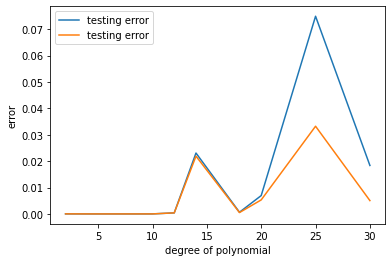

In [56]:
deg = [2,4,6,8,10,12,14,18,20,25,30]
for d in deg:
  solution(d)

plt.plot(deg,train_error)
plt.plot(deg,test_error)
plt.xlabel('degree of polynomial')
plt.ylabel('error')
plt.legend(('testing error','testing error'))
plt.show()

From Above graph of error vs polynomial degree"n", the generalisation is very good upto 12 degree polynomial(i.e difference between training error and testing error).
From the graph It can be seen that both trainig error and testing error increses after n = 12.
So, I will choose n = 8 degree polynomial for above solution which gives most resembles like guassian distribution as shown below

#Plotting of approximated distribution for different order of polynomial

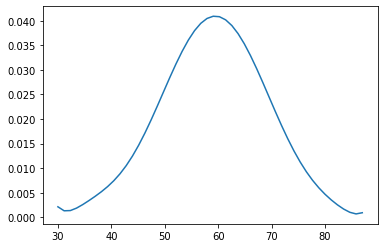

In [57]:
  k = 8                             
  l = 750
  X = np.zeros((l,k+1))
  for i in range(l):
    X[i,0] = 1
    m = 1
    for j in range(1,k+1):
      X[i,j] = data[i]**m
      m = m + 1

  y = []
  for i in data[0:750]:
    Y = (math.exp(-(i - mean)**2/(2*variance)))/(math.sqrt(variance * 2 * 3.142))
    y.append(Y)
 
  b = np.array(y)
  b = np.reshape(b,(-1,1))
x = np.linalg.inv(X.T @ X) @ X.T @ b             #solution by pseudoinverse
coeffs = np.reshape(x,k+1)                       #saving the solution
coeffs = list(coeffs)
x = np.linspace(30, 87, 50)
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.plot(x, y)
plt.show()

#Cholesky decomposition


Yes we can solve by using cholesky factorization since X is a full column rank therefore X.T * X is also full rank(i.e positive definite)


In [58]:
Q = X.T @ X
L = np.linalg.cholesky(Q)
w = np.zeros((9,1))
b = X.T @ b 
# Forward substitution
w[0,0] = b[0,0]/L[0,0]
for i in range(1,9):
  z = b[i,0] 
  for j in range(i):
    z -= L[i,j]*w[j,0]
  w[i,0] = z/L[i,i]

# backward substitution
x = np.zeros_like(w)
x[8,0] = w[8,0]/L.T[8,8]
for i in range(1,9):
  z = w[8-i,0]
  for j in range(i):
    z -= L.T[8-i,8-j] * x[8-j,0]
  x[8-i,0] = z / L.T[8-i,8-i]

  

# Graph given by Cholesky decomposition

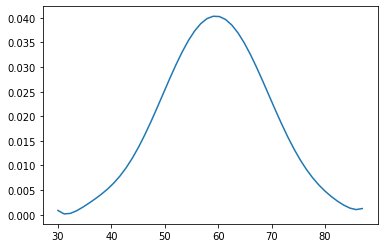

In [59]:
coeffs = np.reshape(x,8+1)                       #saving the solution
coeffs = list(coeffs)
x = np.linspace(30, 87, 50)
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.plot(x, y)
plt.show()

# **Question : 2**

**Portfolio Optimization Problem Formulation:**  Assume that you have some fixed amount of money and you plan to invest in a set of stocks A, B, C, D, E, F, G, H, I and J. From the last 10 years data, the relative price changes of these stocks was modelled using the mean vector (given [here](https://drive.google.com/file/d/1oNuKvtbZlRinTDs3TpVKZrLlkhnHiwd9/view?usp=sharing)) and the covariance matrix (given [here](https://drive.google.com/file/d/1eKZgttmQWW-MHDwnhXyooHkSCjd_s6xt/view?usp=sharing)). Formulate an optimization problem and optimize it using the [cvxopt](https://cvxopt.org/index.html/) library and predict the optimal split of money to be invested (in %) amongst these stocks so that we have a minimum return of atleast 60 %. Comment your code at appropriate locations.

Cost Function : **[0.75 Point]** Constraints   : **[0.75 Point]** Solving : **[1 Point]**






**Cost Function :** Min x.T * Q * x 
1. **constraints** :
*   e.T * x = 1
*   R.T * x >= 0.6
*   x >= 0

          where
          Q = Covariance matrix
          R = mean vector
          e = vector of ones in column
          x = decision variable

In [60]:
d = np.load('avg.npy')   #Importing data matrix
d = d.reshape(10)
cov = np.load('cov.npy') #Importing covariance matrix               
G = np.zeros((11,10))    # Creating matrix required for optimizer 
for i in range(10):
  G[i,i] = -1
G[-1,:] = -d
h = np.zeros((11,1))
h[10,0] = -0.6
A = np.ones((1,10))
b = np.ones((1,1))
q = np.zeros((10,1))



In [61]:
from cvxopt import solvers, matrix
cov = matrix(cov)
G = matrix(G)
q = matrix(q)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [62]:
sol = solvers.qp(cov,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0:  7.3805e-01  4.0341e-01  2e+01  5e+00  7e+00
 1:  1.4184e+00  4.8808e-01  2e+00  2e-01  3e-01
 2:  1.4851e+00  1.2850e+00  3e-01  2e-02  2e-02
 3:  1.4472e+00  1.4057e+00  5e-02  3e-03  4e-03
 4:  1.4262e+00  1.4202e+00  6e-03  3e-04  4e-04
 5:  1.4215e+00  1.4214e+00  1e-04  1e-16  1e-14
 6:  1.4214e+00  1.4214e+00  1e-06  1e-16  5e-15
Optimal solution found.


In [63]:
print(sol['x'])
x = sol['x']
x = np.array(x)

[ 8.69e-07]
[ 2.00e-07]
[ 1.29e-07]
[ 3.71e-01]
[ 1.14e-07]
[ 5.47e-08]
[ 4.10e-06]
[ 2.23e-01]
[ 3.68e-01]
[ 3.81e-02]

